In [34]:
import numpy as np
import matplotlib.pyplot as plt

def getsmear(dd):
    vv = 0
    for ii, iii in dd.items():
        
        if iii[0] == 'constant': 
            vv += iii[1]
        
        elif iii[0] in ['normal', 'uniform']:
            vv += getattr(np.random, iii[0])(iii[1], iii[2])
            
        elif iii[0] in ['choice']:     #per i batch di du 
            vv += np.random.choice(iii[1])
                        
        else: 
            print('check your spelling!!!!!')
    
    return vv
    


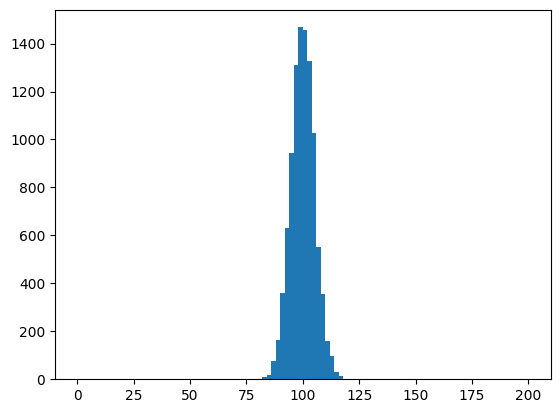

In [35]:
smeardict = {
    
    't0'            : ['constant',  100],
    'retuning'      : ['normal',    0, 1],
    '40K'           : ['normal',    0, 5],
    'altracosa'     : ['uniform',   -2, 2],

}

values = np.array([getsmear(smeardict) for _ in range(10000)])

_ = plt.hist(values, range=[0,200], bins=100)


In [36]:
smearing_perdu =  {'basemodule':['uniform',-2,2], 'processo3_persito':['choice',[-1,2,-1.5]], 'sistematicaProc3per3siti': ['choice', [1,-1,-2]]}
smearing_perdom = {'processo3':['uniform',-1,1] }
smearing_perpmt = {'K40': ['normal',0,3]}

ndu = 115
ndom = 18
npmt = 31

smear_du_dom_pmt = np.zeros((ndu, ndom, npmt))

for idu in range(ndu):
    
    smear_du = getsmear(smearing_perdu)
    
    for idom in range(ndom):
        
        smear_dom = getsmear(smearing_perdom)
        
        for ipmt in range(npmt):
            
            smear_du_dom_pmt[idu,idom,ipmt] += smear_du + smear_dom + getsmear(smearing_perpmt)



print(smear_du_dom_pmt.shape)


du, dom, pmt = 9, 4, 15

smear_du_dom_pmt[du,dom,pmt]

(115, 18, 31)


1.887184323050146